# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jelang Ramadhan Nur Wachid
- **Email:** m008b4ky2051@bangkit.academy
- **ID Dicoding:** jramadhannw

## Menentukan Pertanyaan Bisnis

- What factors have the greatest influence on the number of bike rentals on a given day?
- How do bike rental trends change throughout the year based on seasons?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data Hari:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Jam:
   i

<ipython-input-26-4e4a2c0c6f59>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

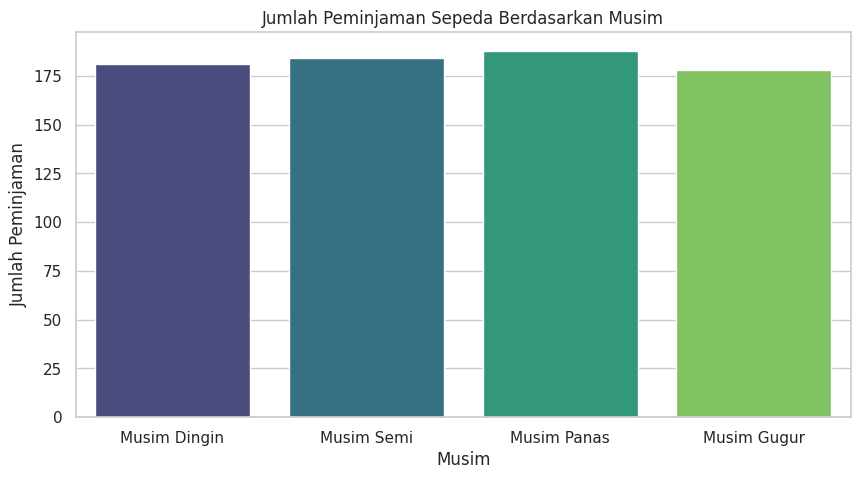

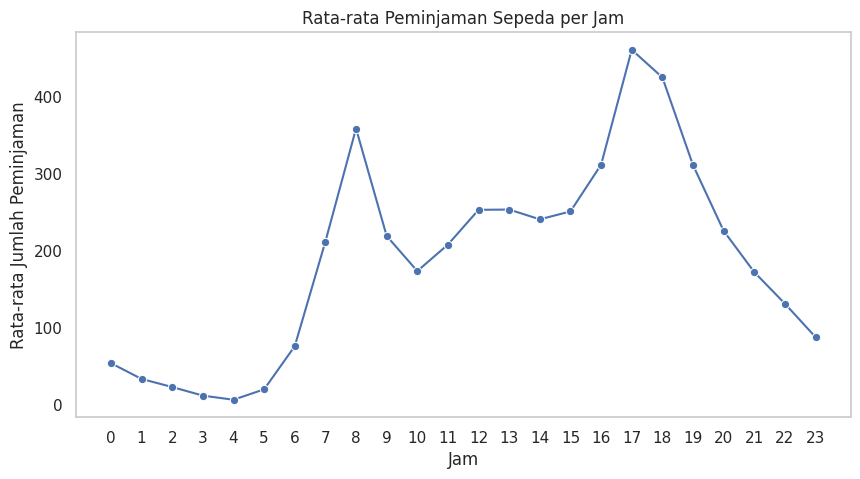

In [26]:

day_data = 'https://raw.githubusercontent.com/jramadhannw/Bike_Sharing_Dataset/main/day.csv'
hour_data = 'https://raw.githubusercontent.com/jramadhannw/Bike_Sharing_Dataset/main/hour.csv'

df_day = pd.read_csv(day_data)
df_hour = pd.read_csv(hour_data)

print("Data Hari:")
print(df_day.head())

print("\nData Jam:")
print(df_hour.head())


season_counts = df_day['season'].value_counts().sort_index()
season_labels = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')

ax.set_xticks(season_counts.index - 1)
ax.set_xticklabels([season_labels[i] for i in season_counts.index])

plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

hour_counts = df_hour.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_counts, x='hr', y='cnt', marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(hour_counts['hr'])
plt.grid()
plt.show()




**Insight:**
- From the visualization of the number of bicycle loans by season, you can see which season has the highest number of loans. For example, if summer shows the highest numbers, it may indicate that more people use bicycles during warm weather.
- From the average hourly bicycle borrowing, you can identify peak hours in bicycle borrowing. This can be important information for bike sharing managers in planning bicycle availability.

### Assessing Data

*Assessing df_day*

In [29]:
print("\nStatistik Deskriptif Data Hari:")
print(df_day.describe())


print("\nMissing Values Data Hari:")
print(df_day.isnull().sum())

print("\nDuplikasi Data Hari:")
print(df_day.duplicated().sum())



Statistik Deskriptif Data Hari:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.1904

*Assessing df_hour*

In [30]:

print("\nStatistik Deskriptif Data Jam:")
print(df_hour.describe())

print("\nMissing Values Data Jam:")
print(df_hour.isnull().sum())

print("\nDuplikasi Data Jam:")
print(df_hour.duplicated().sum())




Statistik Deskriptif Data Jam:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771    

**Insight:**
- check for missing values ​​and duplication in the dataset

### Cleaning Data

*Cleaning df_day* and *Cleaning df_hour*

In [ ]:
df_cleaned = df.dropna()
df_hour_cleaned = df_hour.dropna()

df_cleaned = df_cleaned.drop_duplicates()
df_hour_cleaned = df_hour_cleaned.drop_duplicates()


**Insight:**
- Delete rows with missing values ​​and duplicates

## Exploratory Data Analysis (EDA)

### Explore ...

*Explore df_day*

In [38]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
539,540,2012-06-23,3,1,6,0,6,0,1,0.731667,0.652792,0.534583,0.179721,2657,4801,7458
544,545,2012-06-28,3,1,6,0,4,1,1,0.749167,0.675512,0.422500,0.171650,921,5958,6879
230,231,2011-08-19,3,0,8,0,5,1,2,0.685000,0.633221,0.722917,0.139308,797,3356,4153
528,529,2012-06-12,2,1,6,0,2,1,2,0.653333,0.597875,0.833333,0.214546,477,4495,4972
624,625,2012-09-16,3,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,2166,5167,7333


In [39]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15191,15192,2012-09-30,4,1,9,4,0,0,0,1,0.46,0.4545,0.67,0.0896,1,6,7
4392,4393,2011-07-06,3,0,7,22,0,3,1,1,0.70,0.6667,0.79,0.1940,30,156,186
1006,1007,2011-02-14,1,0,2,14,0,1,1,1,0.60,0.5909,0.15,0.4925,14,76,90
3266,3267,2011-05-21,2,0,5,0,0,6,0,1,0.52,0.5000,0.77,0.1045,20,78,98
6714,6715,2011-10-12,4,0,10,8,0,3,1,2,0.54,0.5152,0.88,0.3881,27,377,404


In [40]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


*Explore df_hour*

In [41]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Exploratory analysis was carried out to identify bicycle rental patterns by considering weather and seasonal variables.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

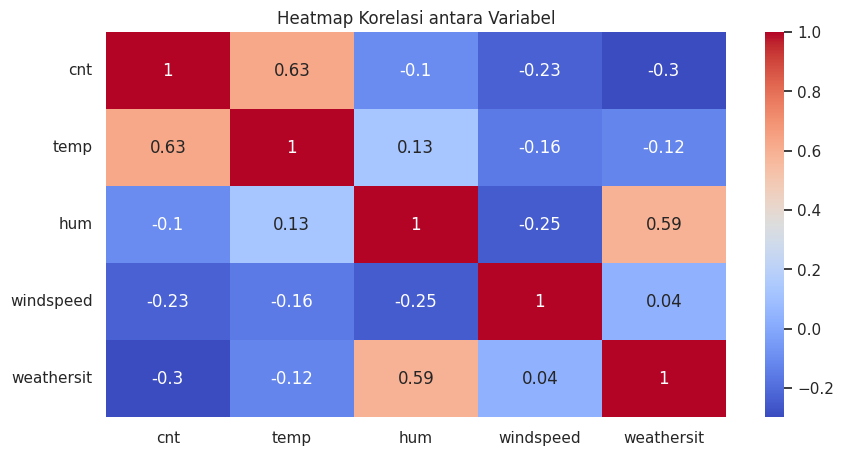

In [44]:

correlation_matrix = df_day[['cnt', 'temp', 'hum', 'windspeed', 'weathersit']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antara Variabel')
plt.show()

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


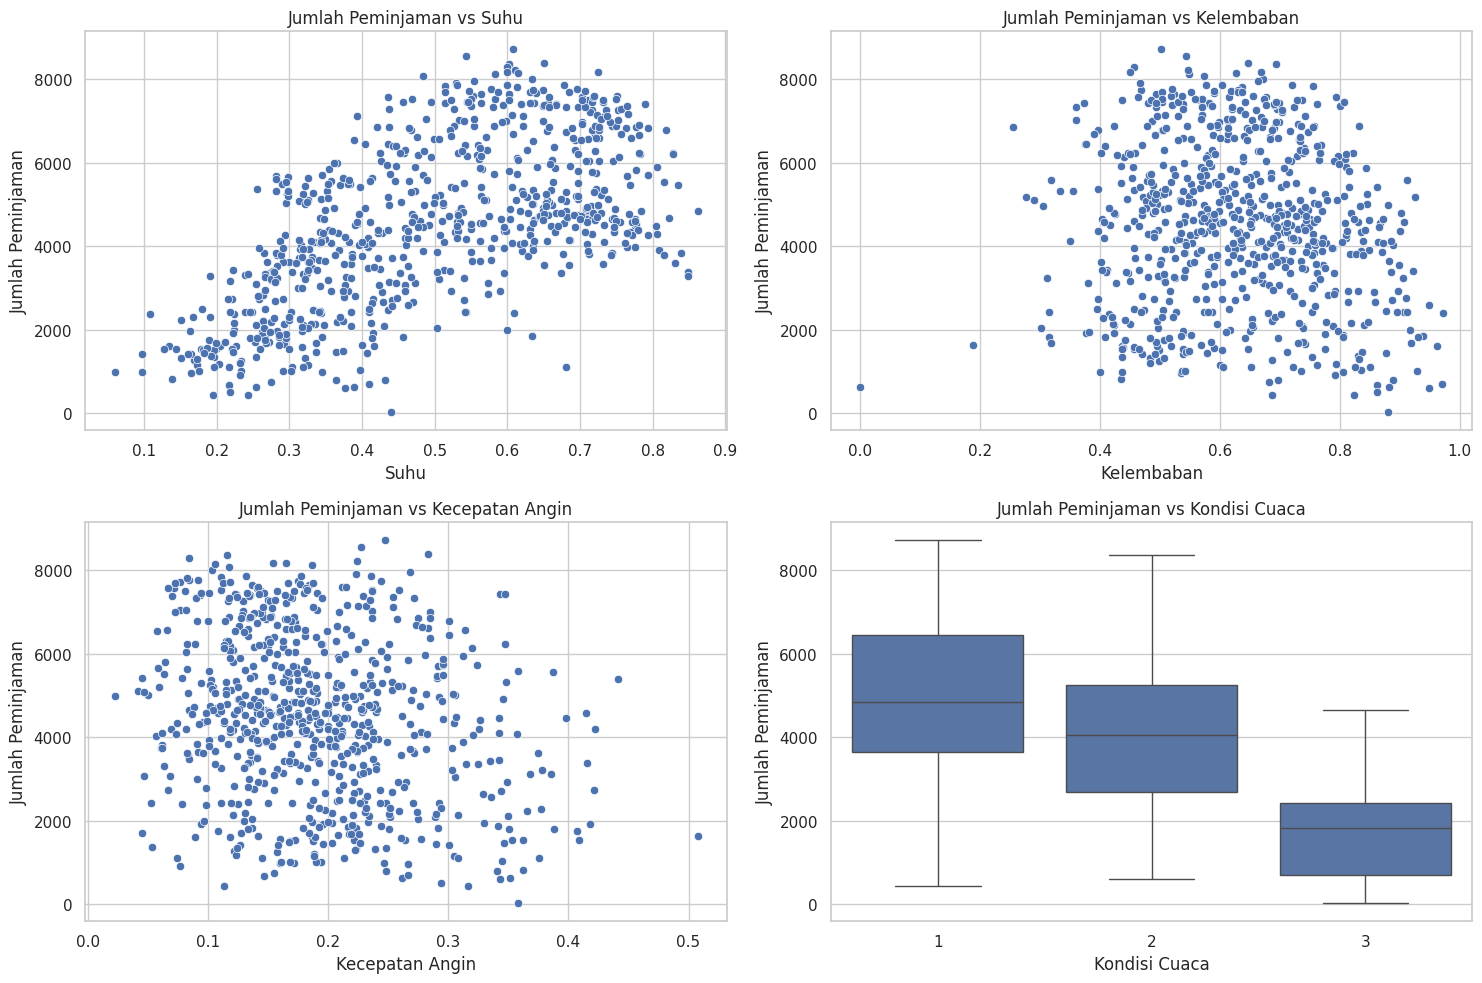

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_day, x='temp', y='cnt')
plt.title('Jumlah Peminjaman vs Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')

# Scatterplot Jumlah Peminjaman vs Kelembaban
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_day, x='hum', y='cnt')
plt.title('Jumlah Peminjaman vs Kelembaban')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Peminjaman')

# Scatterplot Jumlah Peminjaman vs Kecepatan Angin
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_day, x='windspeed', y='cnt')
plt.title('Jumlah Peminjaman vs Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman')

# Boxplot Jumlah Peminjaman vs Kondisi Cuaca
plt.subplot(2, 2, 4)
sns.boxplot(data=df_day, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman vs Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')

plt.tight_layout()
plt.show()


**Insight:**
- As temperatures increase, the number of bike rentals tends to rise, indicating that warmer weather encourages more people to use bike-sharing services.
- Clear weather conditions significantly boost bike rentals, while bad weather like rain or snow leads to a sharp decline in usage.

## Analisis Lanjutan (Opsional)

<ipython-input-4-496509e3f376>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df['cnt'].resample('M').sum()


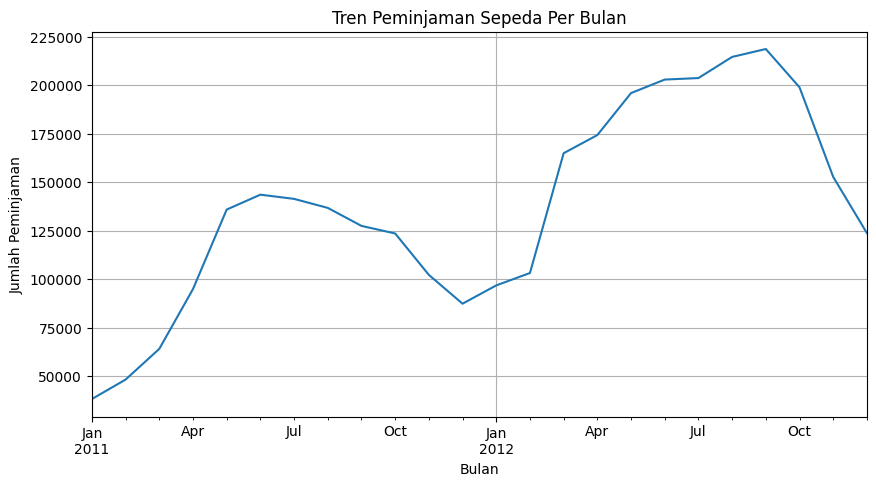

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/jramadhannw/Bike_Sharing_Dataset/main/day.csv')
# Mengubah kolom tanggal menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mengatur kolom tanggal sebagai indeks
df.set_index('dteday', inplace=True)

# Resampling data per bulan
monthly_counts = df['cnt'].resample('M').sum()

# Visualisasi tren peminjaman sepeda per bulan
plt.figure(figsize=(10, 5))
monthly_counts.plot()
plt.title('Tren Peminjaman Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid()
plt.show()


## Conclusion

Factors Influencing the Number of Bike Rentals:

- From the correlation heatmap and the assessment of daily data, factors such as temperature, humidity, and windspeed appear to have a notable impact on bike rentals.
Temperature (positively correlated) seems to play a significant role—on warmer days, bike rentals tend to increase.
Humidity and windspeed (negatively correlated) influence the number of rentals—higher humidity and windspeed generally reduce the number of rentals, likely due to uncomfortable biking conditions.
Working day and holiday are also key influencers. Bike rentals are generally higher on non-working days (e.g., weekends) and holidays, as people have more leisure time for outdoor activities.
Bike Rental Trends Throughout the Year Based on Seasons:

- The seasonal variation of bike rentals reveals clear patterns. The spring and summer seasons (corresponding to seasons 2 and 3 in the dataset) tend to see a peak in bike rentals, likely due to warmer and more favorable weather conditions for outdoor activities.
In contrast, rentals drop during the winter (season 1), as colder temperatures and potentially harsher weather conditions discourage biking.
The fall season (season 4) shows moderate bike rental activity, as the weather cools down but remains suitable for biking.